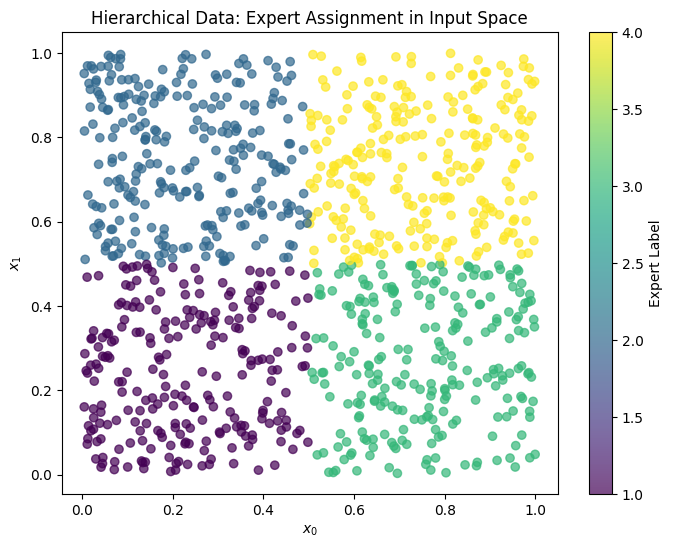

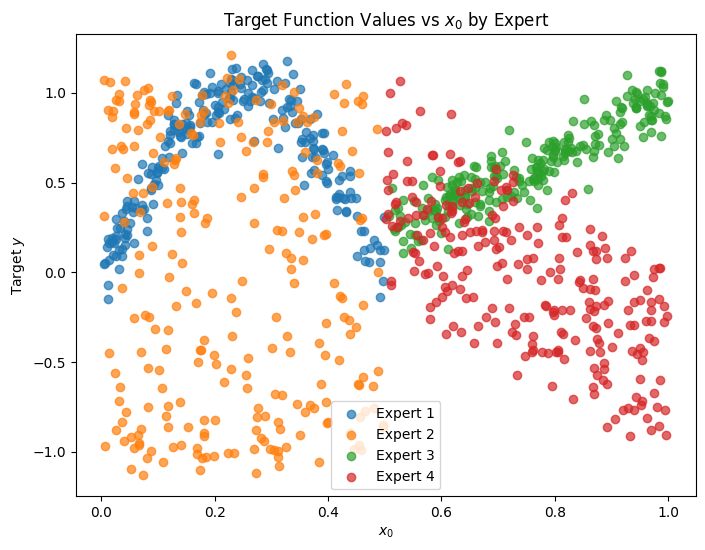

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hierarchical_data(N=1000, noise_std=0.1, random_seed=42):
    """
    Generates a synthetic dataset with a hierarchical target function.
    
    Parameters:
        N (int): Number of data points to generate.
        noise_std (float): Standard deviation of the Gaussian noise added to the target.
        random_seed (int): Seed for reproducibility.
        
    Returns:
        X (np.ndarray): Input features of shape (N, 2) with values in [0, 1].
        y (np.ndarray): Target values of shape (N,).
        expert_labels (np.ndarray): Expert (branch) index for each data point.
    """
    np.random.seed(random_seed)
    
    # Generate N 2D points uniformly distributed in [0, 1]x[0, 1]
    X = np.random.rand(N, 2)
    y = np.zeros(N)
    expert_labels = np.zeros(N, dtype=int)
    
    # Hierarchical generation:
    # First level: Decide branch based on x0
    # Second level: Within each branch, decide expert based on x1 and compute y accordingly.
    for i in range(N):
        x0, x1 = X[i]
        
        if x0 < 0.5:
            # Branch 1
            if x1 < 0.5:
                # Expert 1: A sinusoidal function of x0
                y[i] = np.sin(2 * np.pi * x0) + np.random.normal(0, noise_std)
                expert_labels[i] = 1
            else:
                # Expert 2: A cosine function of x1
                y[i] = np.cos(2 * np.pi * x1) + np.random.normal(0, noise_std)
                expert_labels[i] = 2
        else:
            # Branch 2
            if x1 < 0.5:
                # Expert 3: A quadratic function of x0
                y[i] = (x0 ** 2) + np.random.normal(0, noise_std)
                expert_labels[i] = 3
            else:
                # Expert 4: A linear combination of x0 and x1
                y[i] = 2 * (x1 - x0) + np.random.normal(0, noise_std)
                expert_labels[i] = 4

    return X, y, expert_labels

# Generate the synthetic hierarchical dataset
N = 1000  # Number of samples
noise_std = 0.1
X, y, expert_labels = generate_hierarchical_data(N=N, noise_std=noise_std)

# Visualize the input space colored by the expert that generated each point.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=expert_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Expert Label')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Hierarchical Data: Expert Assignment in Input Space')
plt.show()

# Visualize the target function behavior by plotting y against x0,
# separately for each expert.
plt.figure(figsize=(8, 6))
for label in np.unique(expert_labels):
    idx = expert_labels == label
    plt.scatter(X[idx, 0], y[idx], label=f'Expert {label}', alpha=0.7)
plt.xlabel('$x_0$')
plt.ylabel('Target $y$')
plt.legend()
plt.title('Target Function Values vs $x_0$ by Expert')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def generate_hierarchical_data(N=1000, noise_std=0.1, random_seed=42):
    np.random.seed(random_seed)
    X = np.random.rand(N, 2)
    y = np.zeros(N)
    expert_labels = np.zeros(N, dtype=int)
    
    for i in range(N):
        x0, x1 = X[i]
        if x0 < 0.5:
            # Branch 1
            if x1 < 0.5:
                y[i] = np.sin(2 * np.pi * x0) + np.random.normal(0, noise_std)
                expert_labels[i] = 1
            else:
                y[i] = np.cos(2 * np.pi * x1) + np.random.normal(0, noise_std)
                expert_labels[i] = 2
        else:
            # Branch 2
            if x1 < 0.5:
                y[i] = (x0 ** 2) + np.random.normal(0, noise_std)
                expert_labels[i] = 3
            else:
                y[i] = 2 * (x1 - x0) + np.random.normal(0, noise_std)
                expert_labels[i] = 4
                
    return X, y, expert_labels

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Generate train and test sets
X_train, y_train, labels_train = generate_hierarchical_data(N=2000, noise_std=0.1, random_seed=42)
X_test, y_test, labels_test = generate_hierarchical_data(N=500, noise_std=0.1, random_seed=101)

# Convert to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64)

: 

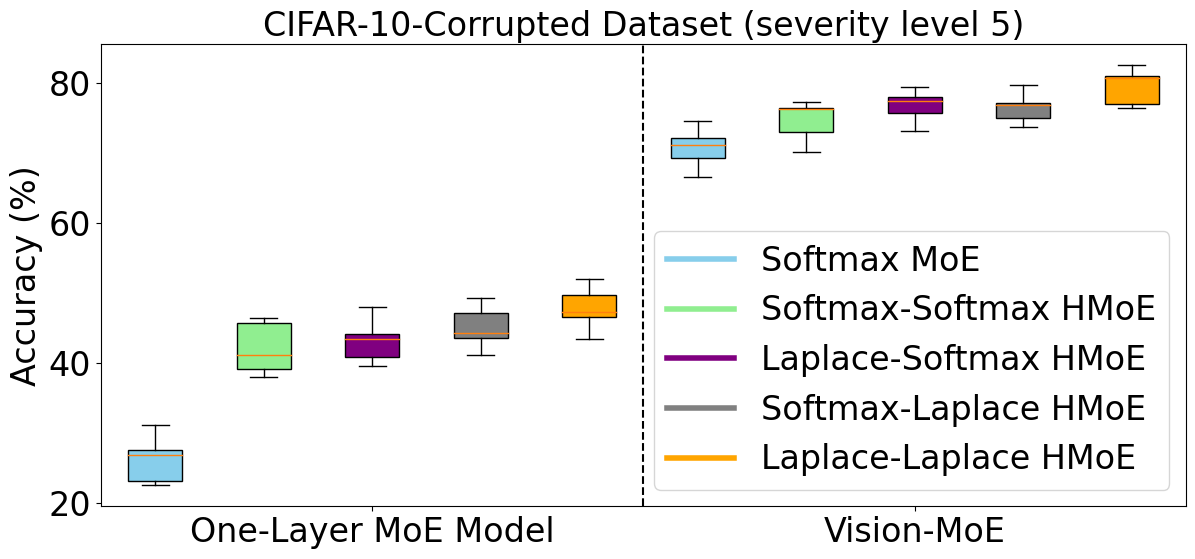

In [22]:
# Data for One-Layer MoE Model and Vision-MoE
one_layer_moe = {
    'Softmax MoE': [27.63, 23.07, 22.52, 31.14, 26.92],
    'Softmax-Softmax HMoE': [41.22, 45.74, 46.43, 39.21, 38.02],
    'Laplace-Softmax HMoE': [43.43, 44.14, 40.88, 39.57, 48.06],
    'Softmax-Laplace HMoE': [47.19, 44.33, 43.56, 41.18, 49.24],
    'Laplace-Laplace HMoE': [49.71, 43.39, 52.08, 46.59, 47.28]
}

vision_moe = {
    'Softmax MoE': [66.63, 69.28, 74.58, 71.17, 72.25],
    'Softmax-Softmax HMoE': [76.39, 72.98, 77.27, 70.14, 76.48],
    'Laplace-Softmax HMoE': [77.46, 78.05, 73.14, 75.83, 79.54],
    'Softmax-Laplace HMoE': [77.24, 79.72, 75.11, 73.83, 76.89],
    'Laplace-Laplace HMoE': [77.12, 81.04, 76.54, 80.83, 82.59]
}

# Combine the data for the two groups
data = [
    one_layer_moe['Softmax MoE'], one_layer_moe['Softmax-Softmax HMoE'], one_layer_moe['Laplace-Softmax HMoE'], 
    one_layer_moe['Softmax-Laplace HMoE'], one_layer_moe['Laplace-Laplace HMoE'],
    vision_moe['Softmax MoE'], vision_moe['Softmax-Softmax HMoE'], vision_moe['Laplace-Softmax HMoE'], 
    vision_moe['Softmax-Laplace HMoE'], vision_moe['Laplace-Laplace HMoE']
]

# Boxplot configuration
fig, ax = plt.subplots(figsize=(14, 6))

box = ax.boxplot(
    data, 
    patch_artist=True,
    labels=[
        'One-Layer MoE Model', 'One-Layer MoE Model', 'One-Layer MoE Model', 
        'One-Layer MoE Model', 'One-Layer MoE Model',
        'Vision-MoE', 'Vision-MoE', 'Vision-MoE', 
        'Vision-MoE', 'Vision-MoE'
    ]
)

# Define colors for the box plot
colors = ['skyblue', 'lightgreen', 'purple', 'gray', 'orange'] * 2

# Apply colors to the box plot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add a vertical dashed line to separate the two groups
ax.axvline(x=5.5, color='black', linestyle='--')

# Set y-axis label and title for the figure
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_title('CIFAR-10-Corrupted Dataset (severity level 5)', fontsize=24)

# Customize tick sizes
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)

# Adjust x-ticks and set labels for each group
ax.set_xticks([3, 8])
ax.set_xticklabels(['One-Layer MoE Model', 'Vision-MoE'], fontsize=24)

# Add legend with specified font size
handles = [
    plt.Line2D([0], [0], color='skyblue', lw=4),
    plt.Line2D([0], [0], color='lightgreen', lw=4),
    plt.Line2D([0], [0], color='purple', lw=4),
    plt.Line2D([0], [0], color='gray', lw=4),
    plt.Line2D([0], [0], color='orange', lw=4)
]
ax.legend(handles, ['Softmax MoE', 'Softmax-Softmax HMoE', 'Laplace-Softmax HMoE', 'Softmax-Laplace HMoE', 'Laplace-Laplace HMoE'], 
          loc='lower right', fontsize=24)

# Display the plot
plt.show()